In [1]:
%run "../../shared/utilz_includez.ipynb"

In [9]:
from skimage import io, img_as_float, img_as_ubyte 
from scipy import ndimage as nd

In [5]:
def plot_image( img_array , plotit=True, title=None, cmapd='gray'):     
    print( f"\n{ '-'*7 } { title if title else type(img_array) } { '-'*7 }" )
    print( f"image.shape = {img_array.shape}" ) 
    print( f"datatype = {img_array.dtype}")
    print( f"min = {np.min(img_array)} , max = {np.max(img_array)}\n" )
    if plotit:
        if cmapd:
            plt.imshow( img_array , cmap=cmapd)
        else:
            plt.imshow( img_array )
    if title:
        plt.title(title)
        

# Key points, Detectors and Descriptors in OpenCV
- **Feature:**
- **Key Point:** Small region of interest 
- **Detector:** Identifies useful key points
- **Descriptor:** Describes the selected key point 

**OpenCV Modules**

***1. Detectors***
You want key points to be at boundaries iff that's the goal. So goodness is fx 
- Harris: `cv2.Harris` - corner dector 
    - works on gray images that are float32
- Shi-Tomasi: `cv2.goodFeaturesToTrack` - key poins detector
    - may work better than Harris

- SIFT and Serve: SIFT = Scale Invariante Feature Transform 
    - Is both a detector and descriptor and heavily used in the past
    - No longer available, though, b/c some patent issues as at this time
    
- FAST: `cv2.FastFeatureDector_create` - corner detector
    - FAST = Features from Accelerated Segment Test 
    - 
***2. Descriptors***
- dectors need to be used with a descriptor if you want to the associated information
- BRIEF `cv2.B`
    - BRIEF = Binary Robust Independent Elementary Features
    - 
- ORB `cv2.ORB_create`: Is both a detector and descriptor
    - ORB = Oriented FAST and Rotated BRIEF << FAST detector and BRIEF descriptor 
    -

**Application:**
- E.G. things may move on a microscope, so can keep track of key points and use them to translate back to original image
- 

In [21]:
from skimage.transform import warp, AffineTransform

import cv2



------- original -------
image.shape = (1824, 2740, 3)
datatype = uint8
min = 0 , max = 255


------- clockwise rotate -------
image.shape = (2811, 3254, 3)
datatype = uint8
min = 0 , max = 255


------- affine/shear -------
image.shape = (1824, 2740, 3)
datatype = float64
min = 0.0 , max = 1.0



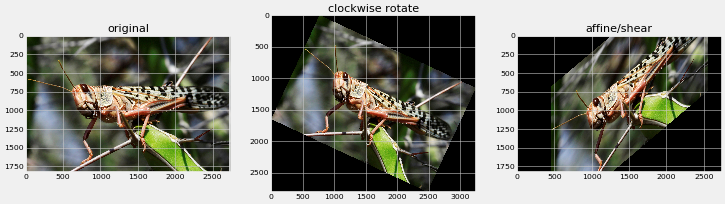

In [78]:
imgpath = "https://africa.cgtn.com/wp-content/photo-gallery/2020/02/2020-01-22T103157Z_898438309_RC2YKE9Z84W6_RTRMADP_3_INDIA-LOCUSTS.jpg"
# imgpath = "https://i.pinimg.com/originals/b0/fe/ae/b0feae81beac9f5ffccc7dc7bc77ca4f.jpg"

img = io.imread( imgpath )

img2 = nd.rotate( img, -25)

af = AffineTransform( scale=(1, 1), rotation=37, shear=0.7, translation=(img.shape[0]/4, img.shape[1]/4) )
# img3 =  nd.rotate( img, 137) #nd.affine_transform(nd.rotate( img, 137) , np.ones( (3,3)))
img3 = warp( img, af.inverse)

nr, nc = 1, 3

plt.subplot(nr, nc, 1)
plot_image( img, title="original")

plt.subplot(nr, nc, 2)
plot_image( img2, title="clockwise rotate")

plt.subplot(nr, nc, 3)
plot_image( img3, title="affine/shear"); 

In [149]:

# requires grayscale and float32
ip = "https://i.pinimg.com/originals/b0/fe/ae/b0feae81beac9f5ffccc7dc7bc77ca4f.jpg"
himg = io.imread(ip)
gimg = np.float32( cv2.cvtColor(himg, cv2.COLOR_BGR2GRAY ) )



[[ 4023.7861  5148.033   9752.367  ... -9213.428  -9033.222  -9146.363 ]
 [ 3291.0242  4165.784   7930.8086 ... -9121.027  -8919.776  -8995.326 ]
 [ 2964.1511  3770.9204  7423.946  ... -9141.578  -9137.594  -9236.107 ]
 ...
 [40567.72   39430.14   37553.1    ... 13739.27   14549.986  14744.418 ]
 [48174.67   47160.29   45963.8    ...  7961.926   9633.693  10112.254 ]
 [52224.348  50611.883  49821.195  ...  7449.9434  9339.775   9899.549 ]]

------- Orignal -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255


------- Orignal Gray -------
image.shape = (407, 600)
datatype = float32
min = 6.0 , max = 255.0


------- Above threshold 1.0% of Harris max -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255



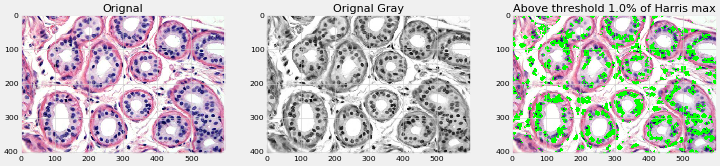

In [150]:
## 1. HARRIS 
harris = cv2.cornerHarris( gimg, 7, 3, 0.04)
print( harris)
hp = 0.01
## show harris at threshold 1% of max as blue
oimg = himg.copy()
oimg[ harris > hp*harris.max() ] = [0, 255, 0] #BGR if read cv2 else RGB


nr, nc = 1, 3

plt.subplot(nr, nc, 1)
plot_image( himg, title="Orignal"); 

plt.subplot(nr, nc, 2)
plot_image( gimg, title="Orignal Gray"); 

plt.subplot(nr, nc, 3)
plot_image( oimg, title= f"Above threshold {hp*100}% of Harris max"); 


------- Orignal -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255


------- Orignal Gray -------
image.shape = (407, 600)
datatype = float32
min = 6.0 , max = 255.0


------- Shi-Tomasi detectors -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255



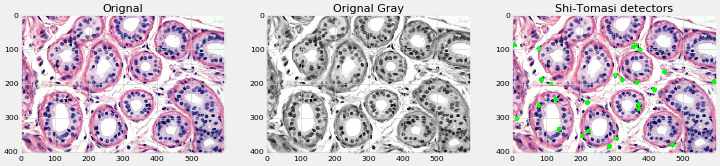

In [151]:
### 2. SHI-TOMASI CORNER DETECTOR - good features to track

shito = np.int64( cv2.goodFeaturesToTrack(gimg, 25, 0.01, 10)  ) #samples 25 
# print( f"shito matrix: \n{shito}")
oimg = himg.copy()
for i in shito:
    x, y = i.ravel()
    z = cv2.circle( oimg, (x,y), 7, (0,255,0), -1) 

    
nr, nc = 1, 3

plt.subplot(nr, nc, 1)
plot_image( himg, title="Orignal"); 

plt.subplot(nr, nc, 2)
plot_image( gimg, title="Orignal Gray"); 

plt.subplot(nr, nc, 3)
plot_image( oimg, title= f"Shi-Tomasi detectors"); 


------- Orignal -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255


------- Orignal Gray -------
image.shape = (407, 600)
datatype = float32
min = 6.0 , max = 255.0


------- FAST detectors -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255



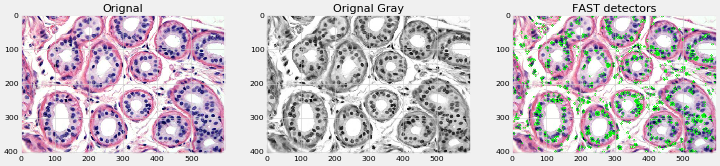

In [152]:
### 3. FAST corner dector 

fast = cv2.FastFeatureDetector_create( 50 ) # samples 50
kp = fast.detect( himg, None) 
# print( f"KP matrix: \n{kp}")
oimg = cv2.drawKeypoints(himg, kp, None, color=(0,255,0), flags=0)


nr, nc = 1, 3

plt.subplot(nr, nc, 1)
plot_image( himg, title="Orignal"); 

plt.subplot(nr, nc, 2)
plot_image( gimg, title="Orignal Gray"); 

plt.subplot(nr, nc, 3)
plot_image( oimg, title= f"FAST detectors"); 

orb descriptors =
[[  2 160 130 ...  12 185 138]
 [160  76  87 ... 153 112 168]
 [ 45  80  45 ... 155  80 145]
 ...
 [181  75  21 ... 123 112   5]
 [  8 226 149 ... 138 129 169]
 [ 68 175 153 ...  75 145  49]]

------- Orignal -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255


------- Orignal Gray -------
image.shape = (407, 600)
datatype = float32
min = 6.0 , max = 255.0


------- ORB detector -------
image.shape = (407, 600, 3)
datatype = uint8
min = 0 , max = 255



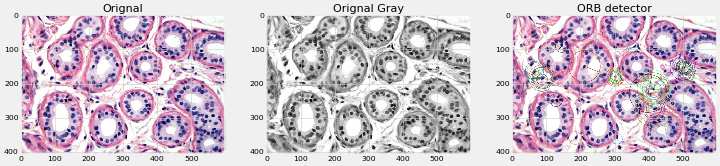

In [155]:
### 4. ORB = Fast detector and Brief descriptor
orb = cv2.ORB_create(50) # sample 50 
kp, descz = orb.detectAndCompute(himg, None)
# print(f"orb key points =\n{kp}" )
print(f"orb descriptors =\n{descz}" )
oimg = cv2.drawKeypoints(himg, kp, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #play with flags to access desriptors

nr, nc = 1, 3

plt.subplot(nr, nc, 1)
plot_image( himg, title="Orignal"); 

plt.subplot(nr, nc, 2)
plot_image( gimg, title="Orignal Gray"); 

plt.subplot(nr, nc, 3)
plot_image( oimg, title= f"ORB detector"); 

---
## Registration

Application on Locust image, to register @ distorted images

**Steps**
1. Import two mages, default and distorted, and covert to grayscale
2. Initiate ORB detector and gen key points and descriptor for each image
3. Match keypoints between the two images
    - Use brute force matcher `cv2.DescriptorMatcher_BRUTEFORCE_HAMMING`
    - Sort match results by the distance measures
4. extract the good key points from the bad ones. use `cv2.RANSAC` to reject bad key points 
    - READ: homography. 
    - RANSAC preprocesses for homography
    - 
5. Register two images using the derived homography matrix


matches results = <class 'list'>, 150, <class 'cv2.DMatch'>

------- Orignal  -------
image.shape = (1824, 2740, 3)
datatype = uint8
min = 0 , max = 255


------- Warped Image  -------
image.shape = (1824, 2740, 3)
datatype = float64
min = 0.0 , max = 1.0


------- ORB detector -------
image.shape = (1824, 2740, 3)
datatype = uint8
min = 0 , max = 255


------- ORB detector -------
image.shape = (1824, 2740, 3)
datatype = uint8
min = 0 , max = 255


------- Matches All -------
image.shape = (1824, 5480, 3)
datatype = uint8
min = 0 , max = 255


------- Matches Homography@Un-warped -------
image.shape = (1824, 2740, 3)
datatype = float64
min = 0.0 , max = 1.0



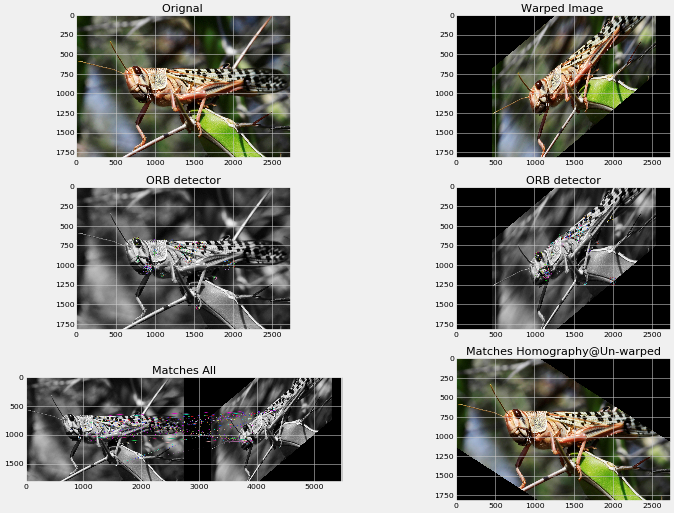

In [181]:
## 5. ORB on On Locust Image
# a. fetch the images in grayscale 
gimg = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)
gimg3 = cv2.cvtColor( img_as_ubyte(img3), cv2.COLOR_BGR2GRAY)


# b. gen key points and descriptors for each image
orb = cv2.ORB_create(150) # sample 50 

kp, descz = orb.detectAndCompute(gimg, None)
# print(f"orb key points = { type(kp)}, {len(kp)}" )
# print(f"orb descriptors = { type(descz)}, {len(descz)}, {descz.shape}" )
oimg = cv2.drawKeypoints(gimg, kp, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #play with flags to access desriptors

kp3, descz3 = orb.detectAndCompute(gimg3, None)
oimg3 = cv2.drawKeypoints(gimg3, kp3, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #play with flags to access desriptors



# c. match key points using brute force matcher 
matcher = cv2.DescriptorMatcher_create( cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)
match_res = matcher.match(descz3, descz, None)
print(f"matches results = { type(match_res)}, {len(match_res)}, { type(match_res[0])}" )
#sort matches list by the distance 
match_res = sorted( match_res , key= lambda x: x.distance )

mimg = cv2.drawMatches(gimg, kp, gimg3, kp3, match_res[:50], None)

# d. reject bad key points
pointz = np.zeros( (len(match_res), 2), dtype=np.float32 )
pointz3 = np.zeros( (len(match_res), 2), dtype=np.float32 )

for i, v in enumerate(match_res):
    pointz3[i, :] = kp3[v.queryIdx].pt
    pointz[i, :] = kp[v.trainIdx].pt


est_homog, mask = cv2.findHomography(pointz3, pointz, cv2.RANSAC)
    
# e. do image registration using the homography matrix
height, width, channels = img.shape

img_reg3 = cv2.warpPerspective(img3, est_homog, (width, height) )
    
# f. plot 
nr, nc = 3, 2

plt.subplot(nr, nc, 1)
plot_image( img, title="Orignal "); 

plt.subplot(nr, nc, 2)
plot_image( img3, title="Warped Image "); 

plt.subplot(nr, nc, 3)
plot_image( oimg, title= f"ORB detector"); 

plt.subplot(nr, nc, 4)
plot_image( oimg3, title= f"ORB detector"); 


plt.subplot(nr, nc, 5)
plot_image( mimg, title= f"Matches All"); 

plt.subplot(nr, nc, 6)
plot_image( img_reg3, title= f"Matches Homography@Un-warped"); 